In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

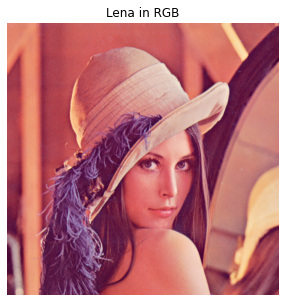

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
img*=255
img = img.astype(int)
plt.figure(figsize=(5,5)),plt.axis('off'),plt.title('Lena in RGB')
plt.imshow(img)

In [ ]:
r,g,b = cv2.split(img)
r = r/255
g = g/255
b = b/255

In [ ]:
hue = []
sat = [] 
val = [] 
for i,j,k in zip(r,g,b): 
  for x,y,z in zip(i,j,k): 
    cmax = max(x,y,z) 
    cmin = min(x,y,z) 
    df = cmax-cmin 
    if cmax == x: 
      h = (((y-z)/df)%6)*60 
    elif cmax == y:
      h = (((z-x)/df)+2)*60 
    elif cmax == z: 
      h = (((x-y)/df)+4)*60 
    elif cmax == cmin:
      h == 0 
    if cmax == 0: 
      s = 0 
    else: 
       s = df/cmax 
    v = cmax 
    hue.append(h) 
    sat.append(s) 
    val.append(v)

In [ ]:
hue = np.reshape(hue,(512,512))
sat = np.reshape(sat,(512,512))
val = np.reshape(val,(512,512))

In [ ]:
print(val.min(), val.max())

0.23137254901960785 1.0


In [ ]:
val += 0.05

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


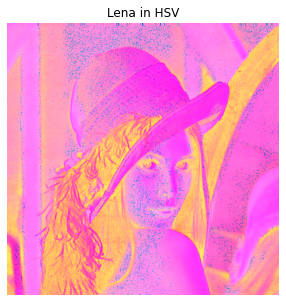

In [ ]:
hsv = cv2.merge((hue,sat,val))
plt.figure(figsize = (5,5)),plt.axis('off'),plt.title('Lena in HSV')
plt.imshow(hsv)

In [ ]:
c = val * sat
x = c * (1- abs(((hue/60)%2)-1))
m = val-c
c1 = []
c2 = []
c3 = []

for i,k,o in zip(hue,c,x):
    for j,l,n in zip(i,k,o):
      if j >= 0 and j < 60:
        # rgb = (c, x, 0)
        c1.append(l)
        c2.append(n)
        c3.append(0)
      elif j >= 60.0 and j < 120:
        # rgb = (x, c, 0)
        c1.append(n)
        c2.append(l)
        c3.append(0)
      elif j >= 120 and j < 180:
        # rgb = (0, c, x)
        c1.append(0)
        c2.append(l)
        c3.append(n)
      elif j >= 180.0 and j < 240:
        # rgb = (0, x, c)
        c1.append(0)
        c2.append(n)
        c3.append(l)
      elif j >= 240.0  and j < 300:
        # rgb = (x, 0, c)
        c1.append(n)
        c2.append(0)
        c3.append(l)
      elif j >= 300.0 and j < 360:
        # rgb = (c, 0, x)
        c1.append(l)
        c2.append(0)
        c3.append(n)

In [ ]:
c1 = np.reshape(c1,(512,512))
c2 = np.reshape(c2,(512,512))
c3 = np.reshape(c3,(512,512))
c1 = (c1+m)*255
c2 = (c2+m)*255
c3 = (c3+m)*255
print(c1.max(),c2.max(),c3.max())
print(c1.min(),c2.min(),c3.min())

267.75 260.59760956175296 237.75
65.10483870967741 3.5625000000000013 8.451327433628336


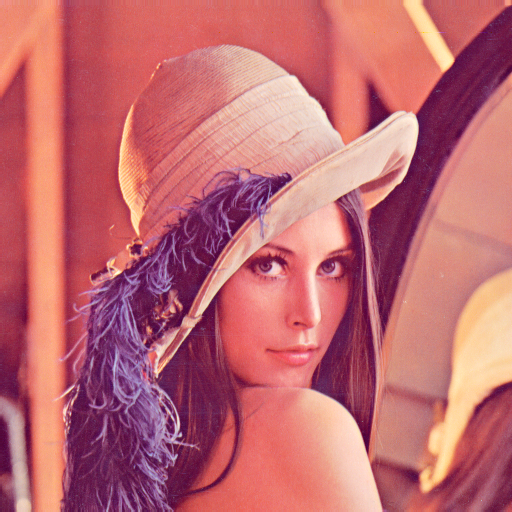

(<matplotlib.image.AxesImage at 0x7f09c7551f10>, (-0.5, 511.5, 511.5, -0.5))

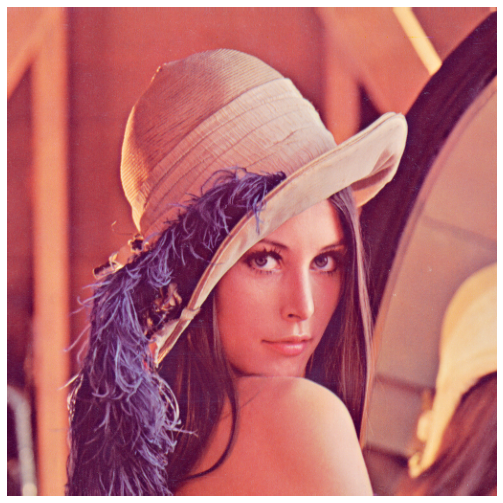

In [ ]:
rgb_im = cv2.merge((c3,c2,c1))
cv2_imshow(rgb_im)
plt.figure(figsize=(9,9))
plt.imshow(img), plt.axis('off')

In [ ]:
print(img.min(),img.max())
print(rgb_im.min(),rgb_im.max())

3 255
3.5625000000000013 267.75
